In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
dG_df = pd.read_csv('/Users/edricchoi/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/88_EKC_Probing_model/Manuscript/Data_elements/11_dG_scale_classification/reference/23_modrate_MRT_fit_with_error.csv')
canonical = pd.read_csv('/Users/edricchoi/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/88_EKC_Probing_model/Manuscript/Data_elements/11_dG_scale_classification/reference/canonical_exclusive_contacts.csv')
canonical_gt1 = pd.read_csv('/Users/edricchoi/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/88_EKC_Probing_model/Manuscript/Data_elements/11_dG_scale_classification/reference/canonical_gt1_contacts.csv')
noncanonical = pd.read_csv('/Users/edricchoi/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/88_EKC_Probing_model/Manuscript/Data_elements/11_dG_scale_classification/reference/noncanonical_contacts.csv')

In [4]:
def merge_dG(canonical, label = 'canonical'):

    can_merged_res1 = canonical.merge(dG_df, left_on = 'res1', right_on = 'site', how = 'inner')[['res1', 'res2', 'site', 'base', 'face1', 'face2', 'cis_trans', 'buffer', 'r2', 'dG', 'dG_err']]
    can_merged_res2 = canonical.merge(dG_df, left_on = 'res2', right_on = 'site', how = 'inner')[['res1', 'res2', 'site', 'base', 'face1', 'face2', 'cis_trans', 'buffer', 'r2', 'dG', 'dG_err']]

    can_merged = pd.concat([can_merged_res1, can_merged_res2], axis = 0)
    can_merged = can_merged.drop_duplicates(subset=[col for col in can_merged.columns if col not in ['res1', 'res2']])
    can_merged = can_merged[can_merged['base'].isin(['A', 'C'])]
    can_merged['buffer'] = can_merged['buffer'].astype(str)
    can_merged['contact'] = label

    return can_merged

can_merged = merge_dG(canonical, 'can')
cangt1_merged = merge_dG(canonical_gt1, 'can_gt1')
noncan_merged = merge_dG(noncanonical, 'non')

all_merged = pd.concat([can_merged, cangt1_merged, noncan_merged], axis = 0)
all_merged['cat'] = all_merged['base'] + all_merged['contact']
all_merged = all_merged.reset_index(drop=True)

all_contacts = pd.read_csv('/Users/edricchoi/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/88_EKC_Probing_model/Manuscript/Data_elements/11_dG_scale_classification/reference/rosie_all_contacts.csv')
contact_sites = list(set(all_contacts['res1']).union(set(all_contacts['res2'])))
no_contact = dG_df[~dG_df['site'].isin(contact_sites)].copy()
no_contact['cat'] = no_contact['base'] + 'no'
# filter As and Cs
no_contact = no_contact[no_contact['base'].isin(['A', 'C'])]

cols_to_keep = ['site', 'base', 'buffer', 'dG', 'cat']
all_merged = pd.concat([all_merged[cols_to_keep], no_contact[cols_to_keep]], axis = 0)
all_merged = all_merged.reset_index(drop=True)

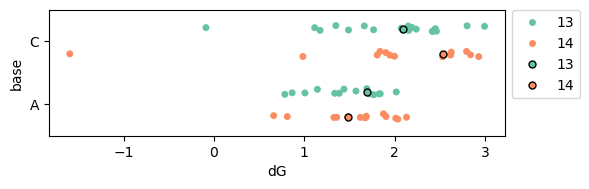

In [5]:
### Strip plot

# Add a highlight column
highlight_sites = [138, 146]
can_highlight = can_merged[can_merged['site'].isin(highlight_sites)].copy()

fig, ax = plt.subplots(figsize=(6, 2))
sns.stripplot(data=can_merged, x="dG", y="base", hue="buffer", dodge=True, jitter=True, palette="Set2", ax = ax)
sns.stripplot(data=can_highlight, x="dG", y="base", hue="buffer", dodge=True, jitter=True, palette="Set2", ax = ax, marker='o', size=5, edgecolor='black', linewidth=1)
ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1.05))
plt.tight_layout()
plt.show()

In [6]:
def select_sites_by_buffer(df, site_buffer_dict):
    """
    Select rows from df where (site, buffer) matches any in the site_buffer_dict.

    Parameters:
        df (pd.DataFrame): Must contain 'site' and 'buffer' columns.
        site_buffer_dict (dict): Keys are site integers, values are lists of allowed buffers.

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    # Convert dictionary into a set of (site, buffer) pairs to match
    allowed_pairs = {(site, buf) for site, buffers in site_buffer_dict.items() for buf in buffers}
    
    # Create a mask where each row's (site, buffer) pair is in allowed_pairs
    mask = df.apply(lambda row: (row['site'], row['buffer']) in allowed_pairs, axis=1)
    
    return df[mask].copy()



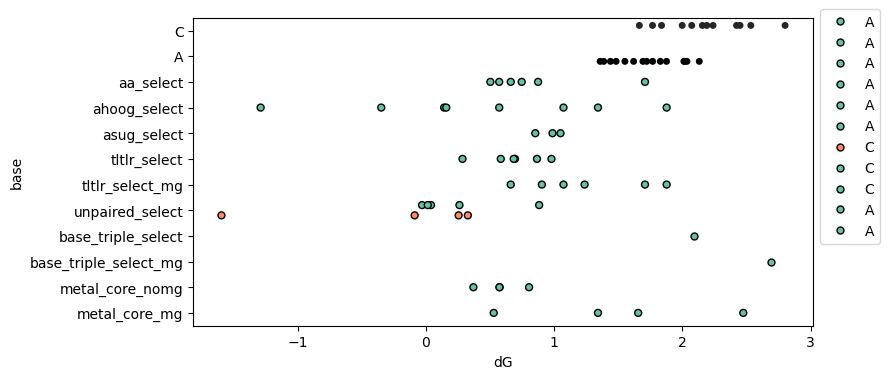

In [7]:
# canonical WC
wcf_select = {
    161: [13, 14], 159: [13, 14], 154: [13, 14], 146: [13, 14],
    145: [13], 229: [13, 14], 232: [13, 14], 230: [13, 14],
    231: [13, 14], 233: [13, 14], 246: [13, 14], 240: [13],
    166: [13], 165: [13], 173: [13], 127: [13], 128: [13]
}

# A-A platform
aa_select = {
    218: [14], 219: [14], 171: [14], 172: [14], 225: [14], 226: [14]
}

# A-hoog
ahoog_select = {
    151: [14], 248: [14], 219: [14], 207: [14], 114: [14], 198: [14], 187: [14], 140: [14], 139: [14]
}

# A-sugar
asug_select = {
    206: [14], 113: [14], 123: [14]
}

# TL-TLR
tltlr_select = {
    151: [13], 152: [13], 153: [13], 225: [13], 226: [13], 248: [13]
}

# TL-TLR
tltlr_select_mg = {
    151: [14], 152: [14], 153: [14], 225: [14], 226: [14], 248: [14]
}

# unpaired
unpaired_select = {
    237: [13, 14], 125: [13, 14], 115: [13, 14], 170: [13, 14], 210: [14]
}

# base triple
base_triple_select_mg = {223: [14]}

# base triple
base_triple_select = {223: [13]}

# metal core

metal_core_select_nomg = {183: [13], 184: [13], 186: [13], 187: [13]}

metal_core_select_mg = {183: [14], 184: [14], 186: [14], 187: [14]}

# Manual select dictionary
select_dict = {'aa_select': aa_select,
               'ahoog_select': ahoog_select,
               'asug_select': asug_select,
               'tltlr_select': tltlr_select,
               'tltlr_select_mg': tltlr_select_mg,
               'unpaired_select': unpaired_select,
               'base_triple_select': base_triple_select,
               'base_triple_select_mg': base_triple_select_mg,
               'metal_core_nomg': metal_core_select_nomg,
               'metal_core_mg': metal_core_select_mg,}

wcf_sites = select_sites_by_buffer(dG_df, wcf_select)
wcf_sites['cat'] = 'WCF'



fig, ax = plt.subplots(figsize=(8, 4))
sns.stripplot(data = wcf_sites, x = "dG", y = "base", hue = 'base', dodge = True, jitter = False, palette='dark:black', ax = ax)

for manual_key in select_dict.keys():
    manual_sites = select_sites_by_buffer(dG_df, select_dict[manual_key])
    manual_sites['cat'] = manual_key
    sns.stripplot(data = manual_sites, x = "dG", y = "cat", hue = 'base', dodge = True, jitter = False, palette = "Set2", ax = ax, edgecolor='black', linewidth=1, size=5)


ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1.05))
plt.savefig('stripplot.pdf', bbox_inches='tight')
plt.show()
#sns.violinplot(data=select, x="dG", y="base", hue = 'base', inner = 'points', palette="Set2", ax = ax)
#sns.violinplot(data=highlight, x="dG", y="base", hue = 'base', inner = 'points', palette="Set2", ax = ax)

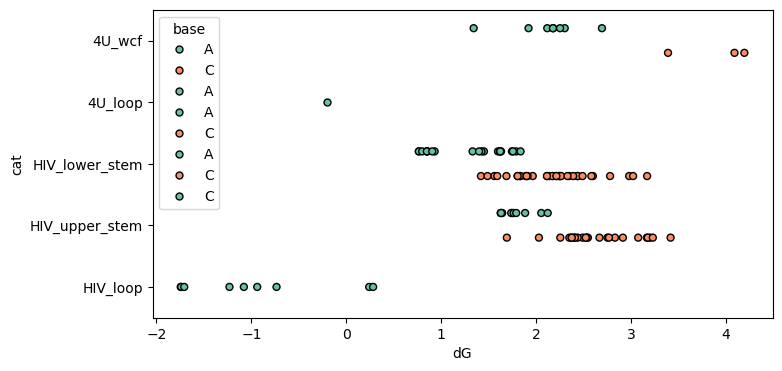

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))

fourU_dG = pd.read_csv('/Users/edricchoi/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/88_EKC_Probing_model/Manuscript/Data_elements/08_dG_barplots/4U_energy_with18A_25C.csv')
# filter to disp_name 4U_a8c
fourU_dG = fourU_dG[fourU_dG['disp_name'] == '4U_a8c'].copy()
fourU_dG['cat'] = '4U'

# exclude loop (18) and AG mismatch (7A in WT)
fourU_dG_wcf = fourU_dG[~fourU_dG['site'].isin([18])].copy()
fourU_dG_wcf['cat'] = '4U_wcf'

# loop and AG mismatch
fourU_loop = fourU_dG[fourU_dG['site'].isin([18])].copy()
fourU_loop['cat'] = '4U_loop'

hiv_dG = pd.read_csv('/Users/edricchoi/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/88_EKC_Probing_model/Manuscript/Data_elements/08_dG_barplots/hiv_calc_dG.csv')
hiv_dG['cat'] = 'HIV'

# filter sites under 23 and above 40
hiv_lower_stem = hiv_dG[hiv_dG['site'].isin([19, 20, 22, 41, 44, 45])].copy()
# sort by base
hiv_lower_stem = hiv_lower_stem.sort_values(by='base')

hiv_upper_stem = hiv_dG[hiv_dG['site'].isin([27, 29, 37, 39])].copy()
# exclude 30-35 in upper stem
hiv_upper_stem = hiv_upper_stem[~hiv_upper_stem['site'].isin([30, 31, 32, 33, 34, 35])].copy()
hiv_lower_stem['cat'] = 'HIV_lower_stem'
hiv_upper_stem['cat'] = 'HIV_upper_stem'
hiv_loop_regions = hiv_dG[hiv_dG['site'].isin([24])].copy()
hiv_loop_regions['cat'] = 'HIV_loop'

#sns.stripplot(data=fourU_dG, x="dG", y="cat", hue='base', dodge=True, jitter=False, palette="Set2", ax=ax, edgecolor='black', linewidth=1, size=5)
#sns.stripplot(data=hiv_dG, x="dG", y="cat", hue='base', dodge=True, jitter=False, palette="Set2", ax=ax, edgecolor='black', linewidth=1, size=5)

sns.stripplot(data=fourU_dG_wcf, x="dG", y="cat", hue='base', dodge=True, jitter=False, palette="Set2", ax=ax, edgecolor='black', linewidth=1, size=5)
sns.stripplot(data=fourU_loop, x="dG", y="cat", hue='base', dodge=True, jitter=False, palette="Set2", ax=ax, edgecolor='black', linewidth=1, size=5)
sns.stripplot(data=hiv_lower_stem, x="dG", y="cat", hue='base', dodge=True, jitter=False, palette="Set2", ax=ax, edgecolor='black', linewidth=1, size=5)
sns.stripplot(data=hiv_upper_stem, x="dG", y="cat", hue='base', dodge=True, jitter=False, palette="Set2", ax=ax, edgecolor='black', linewidth=1, size=5)
sns.stripplot(data=hiv_loop_regions, x="dG", y="cat", hue='base', dodge=True, jitter=False, palette="Set2", ax=ax, edgecolor='black', linewidth=1, size=5)
plt.savefig('stripplot_pH6.5.pdf', bbox_inches='tight')


In [9]:
hiv_lower_stem

,site,disp_name,lnkobs,lnkobs_err,lnkadd,lnkadd_err,base,site_nt,dG,dG_err,cat
74,20,hiv_a35g,-12.891624,0.285467,-10.127057,0.826593,A,20A,1.599408,0.180507,HIV_lower_stem
76,22,hiv_a35g,-11.661529,0.004984,-10.127057,0.826593,A,22A,0.765298,0.003765,HIV_lower_stem
75,22,hiv_a35g,-11.662523,0.042740,-10.127057,0.826593,A,22A,0.766049,0.032273,HIV_lower_stem
100,20,hiv_c30u,-13.125526,0.241356,-10.127057,0.826593,A,20A,1.746243,0.150505,HIV_lower_stem
73,20,hiv_a35g,-12.659108,0.123600,-10.127057,0.826593,A,20A,1.451124,0.079555,HIV_lower_stem
101,20,hiv_c30u,-13.197463,0.070847,-10.127057,0.826593,A,20A,1.791019,0.044018,HIV_lower_stem
102,22,hiv_c30u,-11.774264,0.042646,-10.127057,0.826593,A,22A,0.849201,0.031294,HIV_lower_stem
103,22,hiv_c30u,-11.888284,0.054763,-10.127057,0.826593,A,22A,0.931792,0.039178,HIV_lower_stem
43,22,hiv_gs,-11.783937,0.065071,-10.127057,0.826593,A,22A,0.856291,0.047640,HIV_lower_stem
41,20,hiv_gs,-12.942893,0.579294,-10.127057,0.826593,A,20A,1.631772,0.365074,HIV_lower_stem


In [10]:
hiv_dG

,site,disp_name,lnkobs,lnkobs_err,lnkadd,lnkadd_err,base,site_nt,dG,dG_err,cat
0,2,hiv_wt,-11.837019,0.085701,-10.127057,0.826593,A,2A,0.894917,0.061989,HIV
1,2,hiv_wt,-11.839907,0.036836,-10.127057,0.826593,A,2A,0.897005,0.026627,HIV
2,3,hiv_wt,-11.776645,0.036696,-10.127057,0.826593,A,3A,0.850948,0.026912,HIV
3,3,hiv_wt,-11.864379,0.041134,-10.127057,0.826593,A,3A,0.914648,0.029576,HIV
4,19,hiv_wt,-14.191251,0.177759,-10.958116,1.791457,C,19C,1.891747,0.109643,HIV
...,...,...,...,...,...,...,...,...,...,...,...
158,61,hiv_es2,-11.507531,0.066430,-10.127057,0.826593,A,61A,0.646309,0.052581,HIV
159,62,hiv_es2,-12.175189,0.128696,-10.127057,0.826593,A,62A,1.131674,0.087541,HIV
160,62,hiv_es2,-12.316276,0.118908,-10.127057,0.826593,A,62A,1.226699,0.079338,HIV
161,64,hiv_es2,-13.169104,0.127839,-10.958116,1.791457,C,64C,1.241204,0.085065,HIV


In [11]:
# wcf_sites group by base and get mean
mean_dG = wcf_sites.groupby(['base']).agg({'dG': ['mean']}).reset_index()

# find wcf_site closest to mean dG A
mean_dG_A = mean_dG[mean_dG['base'] == 'A']['dG']['mean']
wcf_sites_A = wcf_sites[wcf_sites['base'] == 'A']
closest_A = wcf_sites_A.iloc[(wcf_sites_A['dG'] - mean_dG_A).abs().argsort()[:1]]
closest_A = closest_A[['site', 'base', 'buffer', 'dG']]
closest_A

mean_dG_C = mean_dG[mean_dG['base'] == 'C']['dG']['mean']
wcf_sites_C = wcf_sites[wcf_sites['base'] == 'C']
closest_C = wcf_sites_C.iloc[(wcf_sites_C['dG'] - mean_dG_C).abs().argsort()[:1]]
closest_C = closest_C[['site', 'base', 'buffer', 'dG']]
closest_C

/var/folders/k7/k3x4cyj90rz6_py6pr8yth9m0000gn/T/ipykernel_36676/1748765858.py:7: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  closest_A = wcf_sites_A.iloc[(wcf_sites_A['dG'] - mean_dG_A).abs().argsort()[:1]]
/var/folders/k7/k3x4cyj90rz6_py6pr8yth9m0000gn/T/ipykernel_36676/1748765858.py:13: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  closest_C = wcf_sites_C.iloc[(wcf_sites_C['dG'] - mean_dG_C).abs().argsort()[:1]]


,site,base,buffer,dG
203,232,C,14,1.836908


In [12]:
fig = px.strip(
    all_merged,
    x="dG",
    y="base",
    color="buffer",
    hover_data=["site"],  # Show site info on hover
    stripmode='group',  # or 'group' if you want dodge-like behavior
)

fig.update_layout(height=400, width=1000)
fig.show()